Para realizar el siguiente análisis sobre funciones raciones complejas, tome como referencia al artículo **"Representación de funciones complejas con GeoGebra usando el método de dominio coloreado"** y posteriormente lo adapte a código Python.

## Tutorial para graficar funciones racionales complejas:

Inicialmente debemos importar los paquetes ```numpy, plotnine``` y ```pandas```, con ```numpy``` podremos implementar casi cualquier tipo de función, además de que con esta libreria podremos generar o describir la matriz que nos permitirá establecer el color de nuestras gráficas; debido a que ```plotnine``` es una libreria especializada en la descripción gráfica de bases de datos, es necesario implementar ```pandas``` para poder construir las bases de datos que posteiormente serán descritas por ```plotnine```.



In [ ]:
import numpy as np
import plotnine as p9
import pandas as pd

A continuación generaremos una matriz de $256\times256$, que nos permitira establecer un "*mapa de color*" que tendrá como ejes al argumento y la norma. 

Para poder definir la dependendencia del color con el argumento y la norma de un número complejo, definimos la función colores, la cual retornara dos colores: el primero viene dado por la dependencia de la norma con el argumento y el segundo de la depencia del argumento con la norma.


In [ ]:
#--------------------------------------------------------------------------------------------------
#------------------------------Definición de la matriz de color------------------------------------
#--------------------------------------------------------------------------------------------------

p = 256                          #Tamaño de la matriz. Si el valor de p es muy pequeño la 
                                 #suavidad en el cambio del color se perderá                         
matcol=np.zeros((p,p)) 
n,m = matcol.shape
for i in range(n):
  for j in range(m):
    matcol[i][j]=(j+n*i)/(p**2)  #A cada elemento se le asigna un valor númerico (color) diferente

#--------------------------------------------------------------------------------------------------
#------Definición de la dependencia del color con el argumento y la norma del número complejo------
#--------------------------------------------------------------------------------------------------

def colores(theta, radio, maxim):   #La función dependerá únicamente del argumento, la norma y el 
                                    #valor maxímo que puede alcanzar la norma
  a = int(theta*p/(2*np.pi)-1)
  b = int(radio*p/maxim-1)
  return [matcol[b,a],matcol[a,b]]  #Retorna los valores norma vs arg y arg vs norma ubicados en 
                                    #la matriz de color

A continuación se definirá la función que permitirá definir nuestra base de datos:

In [ ]:
def datos(f, r=2, step=0.01):                     
  #Se calcularán los datos correspondientes a dominio,
  #rango, argumentos y normas generados por la función f 
  #en un cuadrado de radio r realizando step saltos

  #---Definición del dominio---
  z_real = np.arange(-r,r,step)                   
  z_imag = np.arange(-r,r,step)

  #--Listas donde se guardará la información de f--
  pre_real = []; pre_comp = []   #Parte real y parte compleja de cada elemento del dominio
  im_real = []; im_comp = []     #Parte real y parte compleja de cada elemento del rango
  norma = []; arg = []           #Norma y argumento de cada elemento del rango   
  colnorm = []; colarg = []      #Colores de ambas dependencias

  #---Escritura de las listas---
  for i in range(len(z_real)):
    for j in range(len(z_imag)):
      pre_real.append(z_real[i])            #Se guarda la parte real de cada elemento del dominio
      pre_comp.append(z_imag[j])            #Se guarda la parte compleja de cada elemento del dominio
      z = f(complex(z_real[i],z_imag[j]))   #Se evalua la función en cada elemento del dominio

      #Se calculan los argumentos de cada elemento del rango
      if z.imag>0:            
        theta = np.arctan(z.real/z.imag)         
      elif z.imag<0:
        theta = np.arctan(z.real/z.imag)+np.pi 

      im_real.append(z.real)   #Se guarda la parte real de cada elemento del rango
      im_comp.append(z.imag)   #Se guarda la parte compleja de cada elemento del rango
      norma.append(abs(z))     #Se guarda la norma de cada elemento del rango
      arg.append(theta)        #Se guarda el argumento de cada elemento del rango

  maxim = max(norma)   #Valor maximo que alcanza la norma en el dominio de f

  #---Calculo de colores---
  for i in range(len(arg)):
      colnorm.append(colores(arg[i],
                             norma[i],maxim)[0])   #norma vs argumento
      colarg.append(colores(arg[i],
                            norma[i],maxim)[1])    #argumento vs norma

  return [pre_real, pre_comp, im_real, im_comp, norma,
          arg, colnorm, colarg]   #Lista de datos asociados a la función f

Para ejemplificar lo mencionado anteriormente, tomaremos como ejemplo la función $f_1(z):[-2,2]\times[-2,2]\subset\mathbb{C}\to\mathbb{C}$, dada por 
$$f_1(z)=\frac{1}{z}$$

In [ ]:
#---Definición de la función---
def f1(z):
  return ((1+z)/(1-z))**2

#---Se guardan los datos de f1 en un Dataframe---
datos_f1 = datos(f1)
Data1 = pd.DataFrame({"Eje_real":datos_f1[0],"Eje_complejo":datos_f1[1], "P_real":datos_f1[2],
                     "P_ima":datos_f1[3], "Norma":datos_f1[4],"Arg":datos_f1[5],
                     "Color_norma":datos_f1[6], "Color_arg":datos_f1[7]})

#---Se guardan en un plot los datos de f1 (en este caso el rango)---
ran_plot = p9.ggplot(data=Data1,mapping=p9.aes(x='P_real', y='P_ima', color="Color_norma"))

#-----------------------------------------¡¡¡Nota!!!!------------------------------------------
#Si desea visualizar el rango con respecto al argumento solo debe cambiar color="Color_norma" 
#por color="Color_arg"
#----------------------------------------------------------------------------------------------

Para visualizar la grafica debemos tener en cuenta que los valores muy cercanos a los polos (en este caso $z=0$) seran enviados al "infinito", razon por la cual se presentan gráficas como esta:

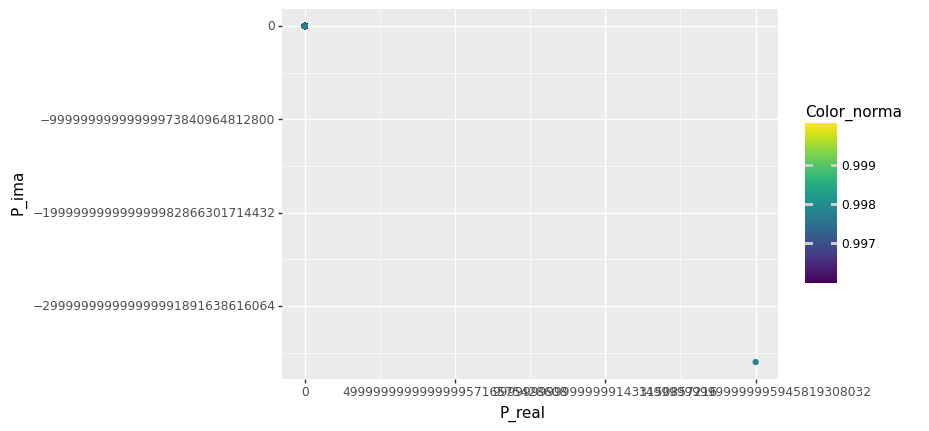

<ggplot: (-9223363291915761369)>

In [ ]:
ran_plot + p9.geom_point()

Para corregir este problema de visualización se puede especificar la región que queremos visualizar:

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 13697 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


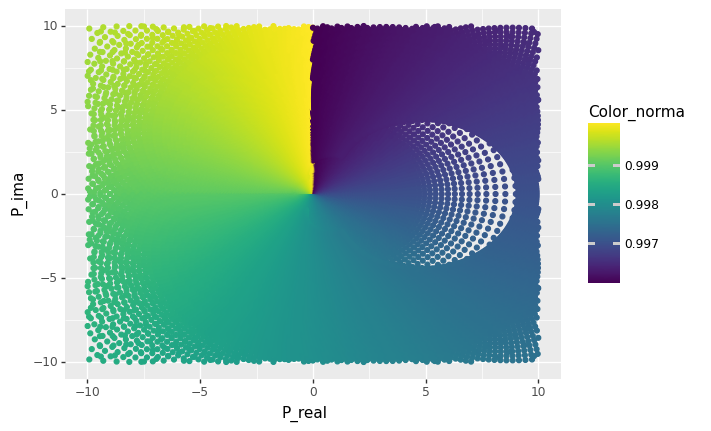

<ggplot: (8744936209114)>

In [ ]:
#---Se escoge un rango de visión (en este caso se tomo un cuadrado de 10x10)---
k=10

ran_plot + p9.geom_point() + p9.lims(x=(-k,k),y=(-k,k)) 

Tambien podemos visualizar el comportamiento del dominio de nuestra función

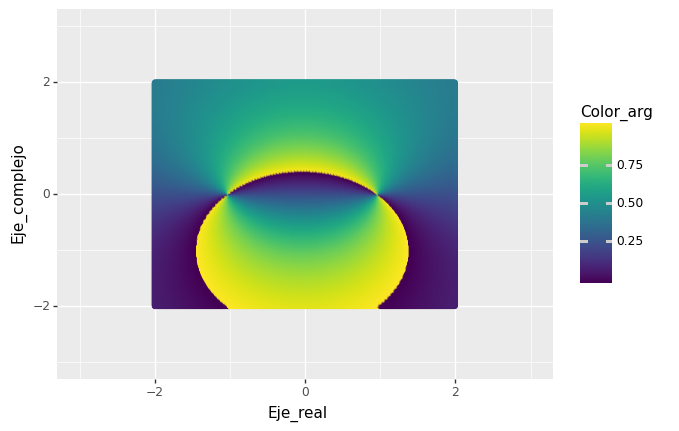

<ggplot: (-9223363291919253118)>

In [ ]:
#---Se guardan en un plot los datos del dominio de f1---
dom_plot = p9.ggplot(data=Data1,mapping=p9.aes(x='Eje_real', y='Eje_complejo', color="Color_arg"))

#---Se escoge el conjunto que queremos visualizar (en este caso el cuadrado de tamaño 3x3)---
k=3
dom_plot + p9.geom_point() + p9.lims(x=(-k,k),y=(-k,k))

#-----------------------------------------¡¡¡Nota!!!!------------------------------------------
#Si desea visualizar el dominio con respecto a la norma solo debe cambiar color="Color_arg" 
#por color="Color_norma"
#----------------------------------------------------------------------------------------------

### Algunos ejemplos particulares

2.   
$$f_2(z)=z+\frac{1}{z}$$

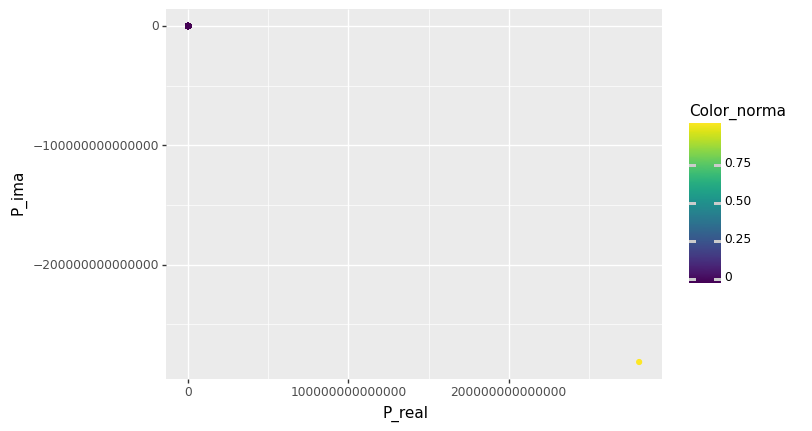

<ggplot: (8763524488866)>

In [ ]:
def f2(z):
  return z+1/z

datos_f2 = datos(f2)
Data2 = pd.DataFrame({"Eje_real":datos_f2[0],"Eje_complejo":datos_f2[1], "P_real":datos_f2[2],
                     "P_ima":datos_f2[3], "Norma":datos_f2[4],"Arg":datos_f2[5],
                     "Color_norma":datos_f2[6], "Color_arg":datos_f2[7]})

ran_plot = p9.ggplot(data=Data2,mapping=p9.aes(x='P_real', y='P_ima', color="Color_norma"))

#---Gráfica del rango de f2---
k=1
ran_plot + p9.geom_point() #+ p9.lims(x=(-k,k),y=(-k,k)) 

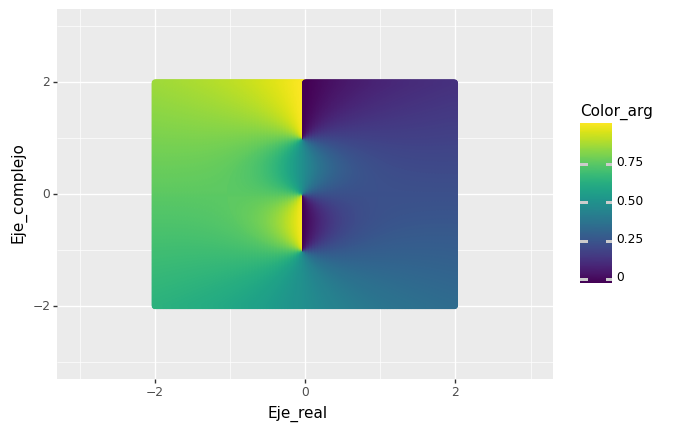

<ggplot: (-9223363273337113919)>

In [ ]:
dom_plot = p9.ggplot(data=Data2,mapping=p9.aes(x='Eje_real', y='Eje_complejo', color="Color_arg"))

#---Gráfica del dominio de f2---
k=3
dom_plot + p9.geom_point() + p9.lims(x=(-k,k),y=(-k,k))

3.   
$$f_3(z)=\log\left(\frac{z-1}{z+1}\right)$$

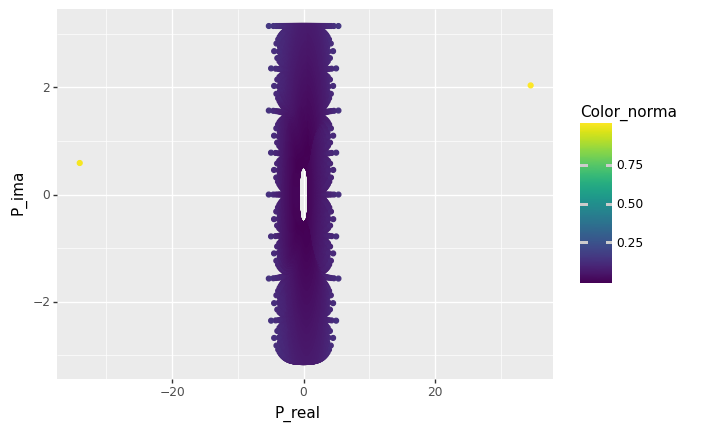

<ggplot: (-9223363273330660615)>

In [ ]:
def f3(z):
  return np.log((z-1)/(z+1))

datos_f3 = datos(f3)
Data3 = pd.DataFrame({"Eje_real":datos_f3[0],"Eje_complejo":datos_f3[1], "P_real":datos_f3[2],
                     "P_ima":datos_f3[3], "Norma":datos_f3[4],"Arg":datos_f3[5],
                     "Color_norma":datos_f3[6], "Color_arg":datos_f3[7]})

ran_plot = p9.ggplot(data=Data3,mapping=p9.aes(x='P_real', y='P_ima', color="Color_norma"))

#---Gráfica del rango de f3---
k=5
ran_plot + p9.geom_point() #+ p9.lims(x=(-k,k),y=(-k,k)) 

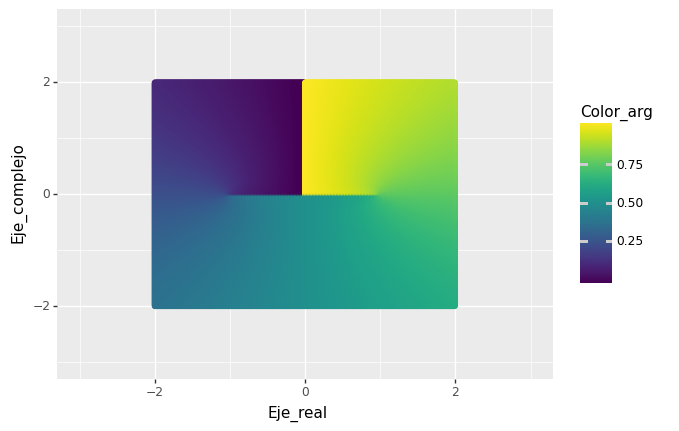

<ggplot: (8763523304589)>

In [ ]:
dom_plot = p9.ggplot(data=Data3,mapping=p9.aes(x='Eje_real', y='Eje_complejo', color="Color_arg"))

#---Gráfica del dominio de f3---
k=3
dom_plot + p9.geom_point() + p9.lims(x=(-k,k),y=(-k,k))

4.   
$$f_4(z)=\frac{\left(\frac{1}{z}\right)^{18}-\frac{1}{z}}{\frac{1}{z}-1}$$

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 10538 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


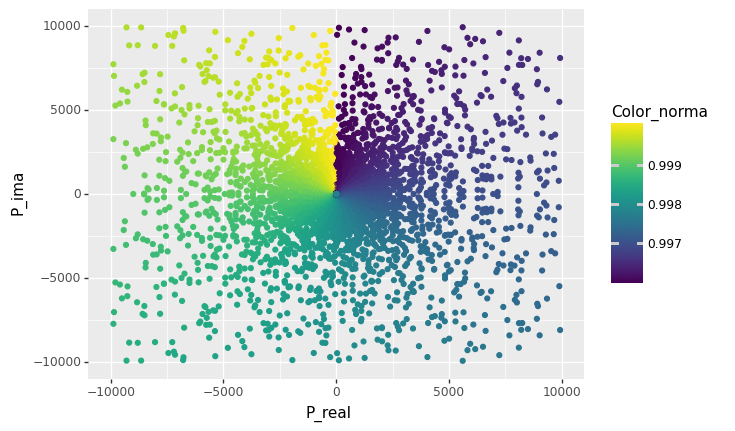

<ggplot: (8763524313727)>

In [ ]:
def f4(z):
  return ((1/z)**18-1/z)/(1/z-1)

datos_f4 = datos(f4)
Data4 = pd.DataFrame({"Eje_real":datos_f4[0],"Eje_complejo":datos_f4[1], "P_real":datos_f4[2],
                     "P_ima":datos_f4[3], "Norma":datos_f4[4],"Arg":datos_f4[5],
                     "Color_norma":datos_f4[6], "Color_arg":datos_f4[7]})

ran_plot = p9.ggplot(data=Data4,mapping=p9.aes(x='P_real', y='P_ima', color="Color_norma"))

#---Grafica del rango de f4---
k=10000
ran_plot + p9.geom_point() + p9.lims(x=(-k,k),y=(-k,k)) 

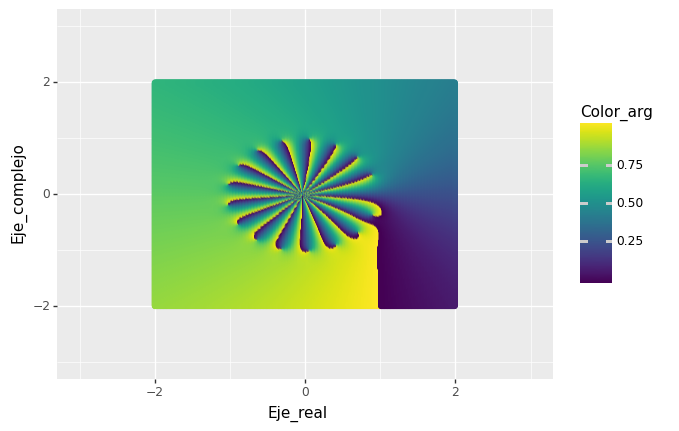

<ggplot: (-9223363273330337427)>

In [ ]:
dom_plot = p9.ggplot(data=Data4,mapping=p9.aes(x='Eje_real', y='Eje_complejo', color="Color_arg"))

#---Gráfica del dominio de f4---
k=3
dom_plot + p9.geom_point() + p9.lims(x=(-k,k),y=(-k,k))

5.   
$$f_5(z)=\sum_{k=1}^{20}\frac{z^k}{1-z^k}$$

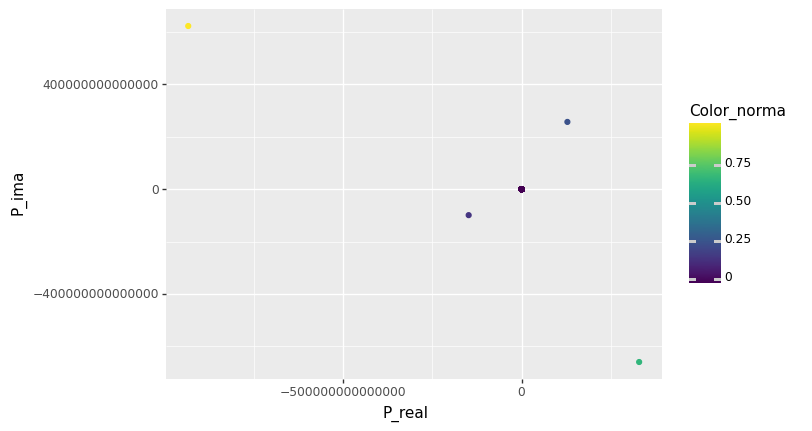

<ggplot: (8763517703144)>

In [ ]:
def f5(z):
  k=0
  for i in range(1,21):
    k=k+(z**i)/(1-z**i)
  return k

datos_f5 = datos(f5)
Data5 = pd.DataFrame({"Eje_real":datos_f5[0],"Eje_complejo":datos_f5[1], "P_real":datos_f5[2],
                     "P_ima":datos_f5[3], "Norma":datos_f5[4],"Arg":datos_f5[5],
                     "Color_norma":datos_f5[6], "Color_arg":datos_f5[7]})

ran_plot = p9.ggplot(data=Data5,mapping=p9.aes(x='P_real', y='P_ima', color="Color_norma"))

#---Gráfica del rango de f5--
k=10
ran_plot + p9.geom_point() #+ p9.lims(x=(-k,k),y=(-k,k)) 

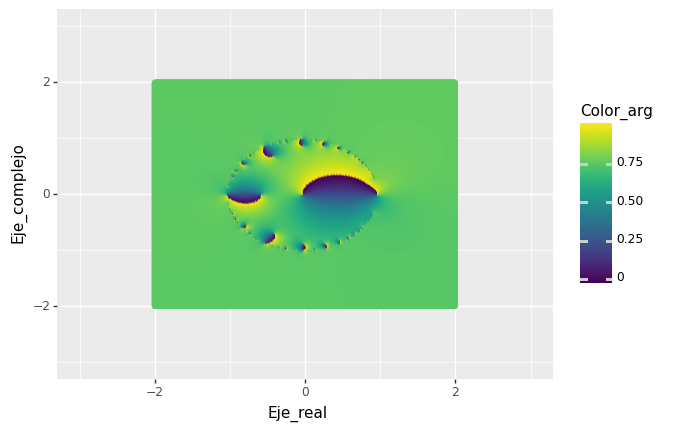

<ggplot: (-9223363273337072682)>

In [ ]:
dom_plot = p9.ggplot(data=Data5,mapping=p9.aes(x='Eje_real', y='Eje_complejo', color="Color_arg"))

#---Gráfica del dominio de f5---
k=3
dom_plot + p9.geom_point() + p9.lims(x=(-k,k),y=(-k,k))

6.   
$$f_6(z)=\frac{1-\cos(z)}{z^2}$$

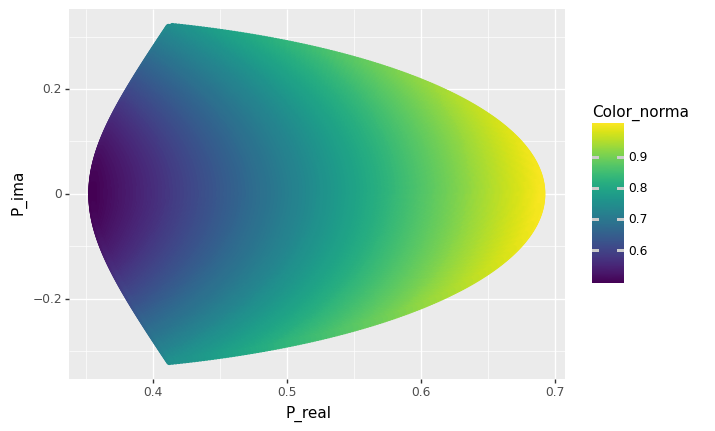

<ggplot: (8763516628835)>

In [ ]:
def f6(z):
  return (1-np.cos(z))/z**2

datos_f6 = datos(f6)
Data6 = pd.DataFrame({"Eje_real":datos_f6[0],"Eje_complejo":datos_f6[1], "P_real":datos_f6[2],
                     "P_ima":datos_f6[3], "Norma":datos_f6[4],"Arg":datos_f6[5],
                     "Color_norma":datos_f6[6], "Color_arg":datos_f6[7]})

ran_plot = p9.ggplot(data=Data6,mapping=p9.aes(x='P_real', y='P_ima', color="Color_norma"))

#---Gráfica del rango de f6--
k=10
ran_plot + p9.geom_point() #+ p9.lims(x=(-k,k),y=(-k,k)) 

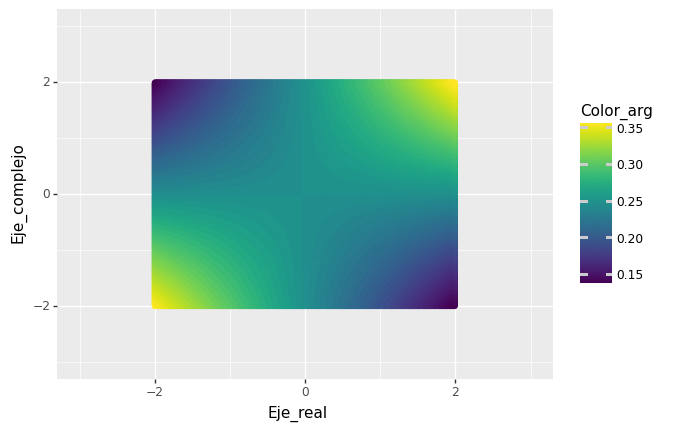

<ggplot: (8763517705245)>

In [ ]:
dom_plot = p9.ggplot(data=Data6,mapping=p9.aes(x='Eje_real', y='Eje_complejo', color="Color_arg"))

#---Gráfica del dominio de f6---
k=3
dom_plot + p9.geom_point() + p9.lims(x=(-k,k),y=(-k,k))